In [27]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

002
004
005
006
007


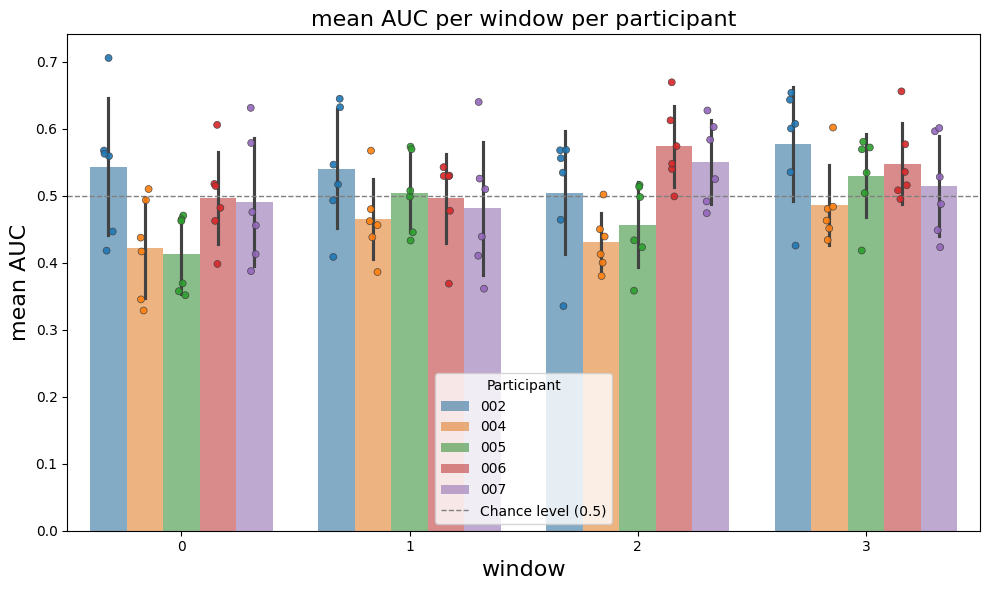

In [123]:
data_folder = 'figures' 
data = [f'{data_folder}/{x}' for x in os.listdir(data_folder) if 'csv' in x]

df_list = []
for d in data:
    print(d.split('.')[0][-3:])
    df = pd.read_csv(d)
    df['participant'] = d.split('.')[0][-3:]  # optional: keep track of source
    df_list.append(df)
combined_df = pd.concat(df_list, ignore_index=True)
grouped_df = combined_df.groupby(['window', 'participant'])['mean_auc'].mean().reset_index()


#plot
plt.figure(figsize=(10,6))
sns.barplot(data=combined_df, x='window', y='mean_auc', hue='participant', alpha=0.6, errorbar='sd')
sns.stripplot(data=combined_df, x='window', y='mean_auc', hue='participant',
              dodge=True, jitter=True, alpha=0.9, marker='o', linewidth=0.5)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1, label='Chance level (0.5)')
plt.title('mean AUC per window per participant', fontsize=16)
plt.xlabel('window', fontsize=16)
plt.ylabel('mean AUC', fontsize=16)

handles, labels = plt.gca().get_legend_handles_labels()

# Remove duplicate labels while keeping order
unique = dict()
for h, l in zip(handles, labels):
    if l not in unique:
        unique[l] = h

plt.legend(unique.values(), unique.keys(), title='Participant')
#plt.legend(loc='lower center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_position(('outward', 100))  # Add padding to the bottom
ax.spines['right'].set_position(('outward', 100)) 
plt.tight_layout()
plt.savefig('figures/mean_auc_per_window_per_participant.png',dpi=300, bbox_inches='tight')
plt.show()

In [34]:
combined_df

,window,band,accuracy,mean_auc,p_value,participant
0,0,Alpha,0.494505,0.558929,0.246732,002
1,0,Beta,0.613815,0.705357,0.007613,002
2,0,Delta,0.462323,0.417857,0.832397,002
3,0,Gamma,0.516484,0.567262,0.217082,002
4,0,High-gamma,0.547096,0.562500,0.234023,002
...,...,...,...,...,...,...
115,3,Beta,0.461538,0.527778,0.383859,007
116,3,Delta,0.450549,0.423016,0.819567,007
117,3,Gamma,0.593407,0.596032,0.138851,007
118,3,High-gamma,0.593407,0.600794,0.127567,007


In [89]:
#mean AUC per window per participant
#prepare data
windows = combined_df['window']
mean_auc = combined_df['mean_auc']
participant= combined_df['participant']

#get mean AUC per window per participant
data_folder = 'figures' 
data = [f'{data_folder}/{x}' for x in os.listdir(data_folder) if 'csv' in x]
mean_df_list = []
aucs = {}

for f in data:
    df = pd.read_csv(f)
    windows = df['window']
    mean_auc = df['mean_auc']
    window_values = []
    for i, window in enumerate(windows):
        window_values.append(mean_auc[i])
    


In [97]:
df[['window','mean_auc']]

,window,mean_auc
0,0,0.455556
1,0,0.578571
2,0,0.475397
3,0,0.387302
4,0,0.412698
5,0,0.630952
6,1,0.509524
7,1,0.639683
8,1,0.361111
9,1,0.438889
